In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 8


In [4]:
data = ImageDataBunch.from_folder('data',train=".",valid_pct=0.2, ds_tfms=get_transforms(),
                                  size=224,bs =bs).normalize(imagenet_stats)


In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate,accuracy])

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.478991,0.519413,0.140000,0.860000,00:24
1,0.560592,0.601329,0.200000,0.800000,00:24
2,0.523344,0.830038,0.160000,0.840000,00:24
3,0.443779,0.851832,0.180000,0.820000,00:24


In [17]:
learn.save('stage-1')

In [12]:
learn.unfreeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


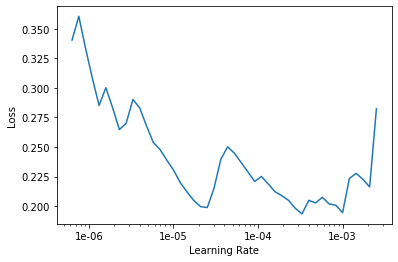

In [19]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(4, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.277217,0.868340,0.200000,0.800000,00:25
1,0.338399,0.668279,0.200000,0.800000,00:25
2,0.290475,0.622742,0.200000,0.800000,00:25
3,0.340172,0.638206,0.180000,0.820000,00:25


In [15]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (204 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
naixue,naixue,naixue,naixue,naixue
Path: data;

Valid: LabelList (50 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
xicha,naixue,xicha,xicha,naixue
Path: data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [22]:
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.184056,0.628446,0.140000,0.860000,00:25
1,0.268687,0.629053,0.140000,0.860000,00:25
2,0.238240,0.645809,0.120000,0.880000,00:25
3,0.199982,0.669922,0.140000,0.860000,00:25


In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [23]:
interp = ClassificationInterpretation.from_learner(learn)

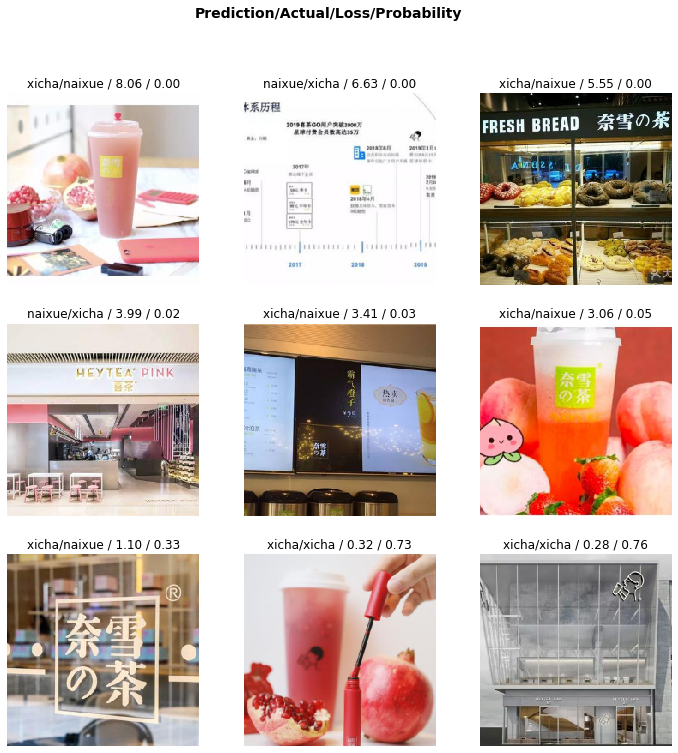

In [29]:
interp.plot_top_losses(9)

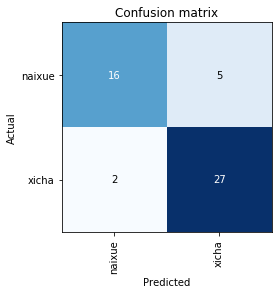

In [30]:
interp.plot_confusion_matrix()

In [33]:
doc(learn.predict)
